In [17]:
import pandas as pd
df = pd.read_csv(r'/Users/keerthika/Downloads/train.csv')
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [18]:
df.shape

(22083, 45)

In [19]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [21]:
for i in df.select_dtypes(include="number").columns:
    df[i]=imputer.fit_transform(df[[i]])

In [22]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [23]:
for i in ["Inherited from father","Maternal gene","Family Name","Institute Name","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Parental consent","Follow-up","Gender","Birth asphyxia","Autopsy shows birth defect (if applicable)","Place of birth","Folic acid details (peri-conceptional)","H/O serious maternal illness","H/O radiation exposure (x-ray)","H/O substance abuse","Assisted conception IVF/ART","History of anomalies in previous pregnancies","Birth defects","Blood test result","Genetic Disorder","Disorder Subclass"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Patient First Name                                  0
Family Name                                         0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Institute Name                                      0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                      

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Genetic Disorder', axis=1) 
y = df['Genetic Disorder']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8994792845822956
Classification Report:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.89      0.93      0.91      2485
Multifactorial genetic inheritance disorders       0.91      0.75      0.82       433
            Single-gene inheritance diseases       0.91      0.89      0.90      1499

                                    accuracy                           0.90      4417
                                   macro avg       0.90      0.86      0.88      4417
                                weighted avg       0.90      0.90      0.90      4417



In [10]:
selected_columns = [
    'Patient Age', 'Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene',
    'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up', 'Gender', 'Birth asphyxia',
    'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
    'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART',
    'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects',
    'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3'
]

df_selected = df[selected_columns]
df_selected.shape

(22083, 24)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_selected 
y = df['Genetic Disorder']  

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modeling
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5469775865972379
Classification Report:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.57      0.92      0.70      2485
Multifactorial genetic inheritance disorders       0.38      0.01      0.03       433
            Single-gene inheritance diseases       0.35      0.09      0.14      1499

                                    accuracy                           0.55      4417
                                   macro avg       0.43      0.34      0.29      4417
                                weighted avg       0.47      0.55      0.44      4417



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


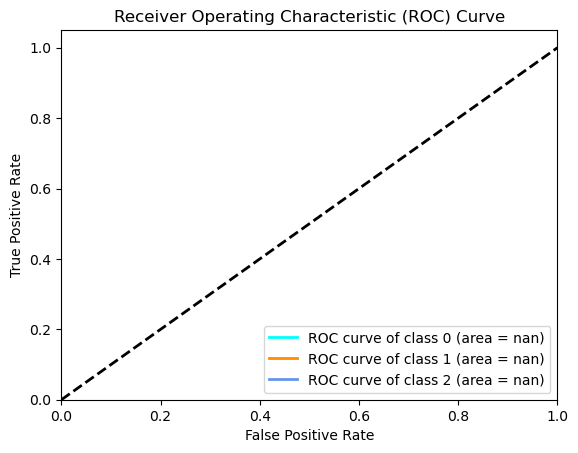

In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output (assuming y has multiple classes)
n_classes = len(y.unique())
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_train_bin = label_binarize(y_train, classes=range(n_classes))

# Predict probabilities for the positive class
y_score = rf_classifier.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meanin

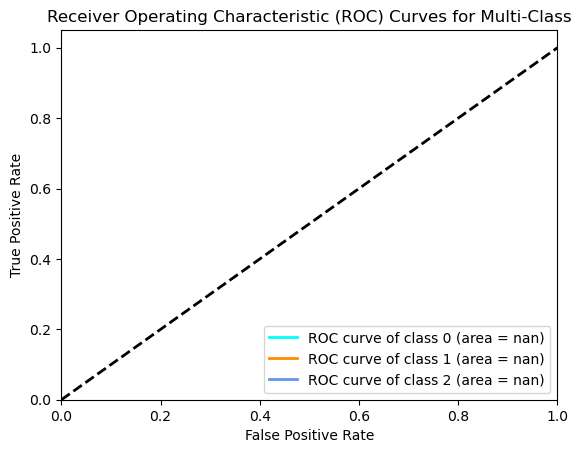

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# Step 1: Load the Data
# Replace 'your_data.csv' with your dataset
X = df.drop('Genetic Disorder', axis=1) 
y = df['Genetic Disorder']  
# Convert categorical features to numeric using label encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2
n_classes = y.shape[1]

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Model
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Step 5: Predict Probabilities
y_score = rf_model.predict_proba(X_test)

# Step 6: Compute AUC and Plot ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class')
plt.legend(loc="lower right")
plt.show()


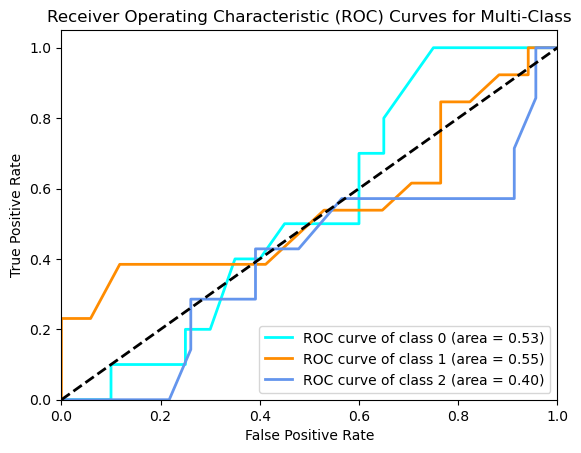

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# Sample Dataset (Replace with your dataset)
# Creating a sample dataset for demonstration
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.choice([0, 1, 2], size=100)  # 100 samples with 3 classes

# Convert to DataFrame for consistency
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
data['Genetic Disorder'] = y

# Step 1: Load the Data
# Replace 'your_data.csv' with your dataset
# data = pd.read_csv('your_data.csv')

# Step 2: Preprocess the Data
# Assuming the target variable is 'target' and features are all other columns
X = data.drop('Genetic Disorder', axis=1) 
y = data['Genetic Disorder']  

# Convert categorical features to numeric using label encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2
n_classes = y.shape[1]

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Model
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Step 5: Predict Probabilities
y_score = rf_model.predict_proba(X_test)

# Step 6: Compute AUC and Plot ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class')
plt.legend(loc="lower right")
plt.show()
